In [76]:
import pandas as pd
import numpy as np 
import re 
import nltk 
import matplotlib.pyplot as plt

from gensim.models import word2vec
from sklearn.manifold import TSNE


### Get Data

In [61]:
df = pd.read_csv('../data/data.csv')
df = df[:10]

In [62]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


### Build Corpus

In [63]:
# corpus = list(set(word.lower() for sentence in df['Sentence'].tolist() for word in sentence.split(' ')))

def build_corpus(_df):
    """ 
    >>> [['test', 'bobo'], ['sdsa']]
    """
    return [[word.lower() for word in sentence.split(' ')] for sentence in df['Sentence'].tolist()]

corpus = build_corpus(df)
# corpus

### Create word Embedding with Word2Vec

In [64]:
model = word2vec.Word2Vec(corpus, vector_size=1000, window=5, min_count=1)

In [69]:
word1, word2 = 'quarter', 'down'
print(model.wv[word1])
print(model.wv.most_similar(word1))
print(model.wv.similarity(word1, word2))

[ 3.02271947e-04  6.20068691e-04  8.25470022e-04 -7.46106962e-04
 -7.87705176e-06 -5.13061765e-04  8.49217584e-04  9.17757279e-04
 -6.42085564e-04  8.31092184e-04 -6.30682101e-04 -6.48378220e-04
 -5.97611011e-04  2.49173667e-04  8.43163929e-04 -6.61886472e-04
  4.28688276e-04 -5.77022511e-05 -6.42724161e-04  1.72986955e-04
 -3.41201434e-04 -4.19105985e-04  8.55119550e-04 -7.50302628e-04
 -9.43786654e-05 -6.92880421e-04  8.45662900e-04  7.03513389e-04
 -8.38451961e-05 -4.89237020e-04  7.64560013e-04 -8.54878686e-04
  1.12288035e-04  6.82416081e-04 -2.83028989e-04 -3.30133043e-04
 -8.83377448e-04 -9.77310352e-04 -4.36252187e-04 -8.32837541e-04
 -6.36694138e-04  9.56431322e-04 -1.60585769e-04  6.15526922e-04
  2.61801961e-05  8.14229017e-04  8.20809684e-04 -4.27461404e-04
  1.65418751e-04 -7.19765725e-04 -4.55032074e-04 -4.12601075e-05
 -9.25778222e-05 -2.32365754e-04 -6.24394277e-04 -8.89799907e-04
  1.44257225e-04 -6.98486983e-04  8.40458611e-04 -2.76819541e-04
 -6.28334761e-04 -6.24203

In [71]:
vocab_dict = model.wv.key_to_index
vocab = vocab_dict.keys()

### Create TSNE

/home/yukikongju/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/yukikongju/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


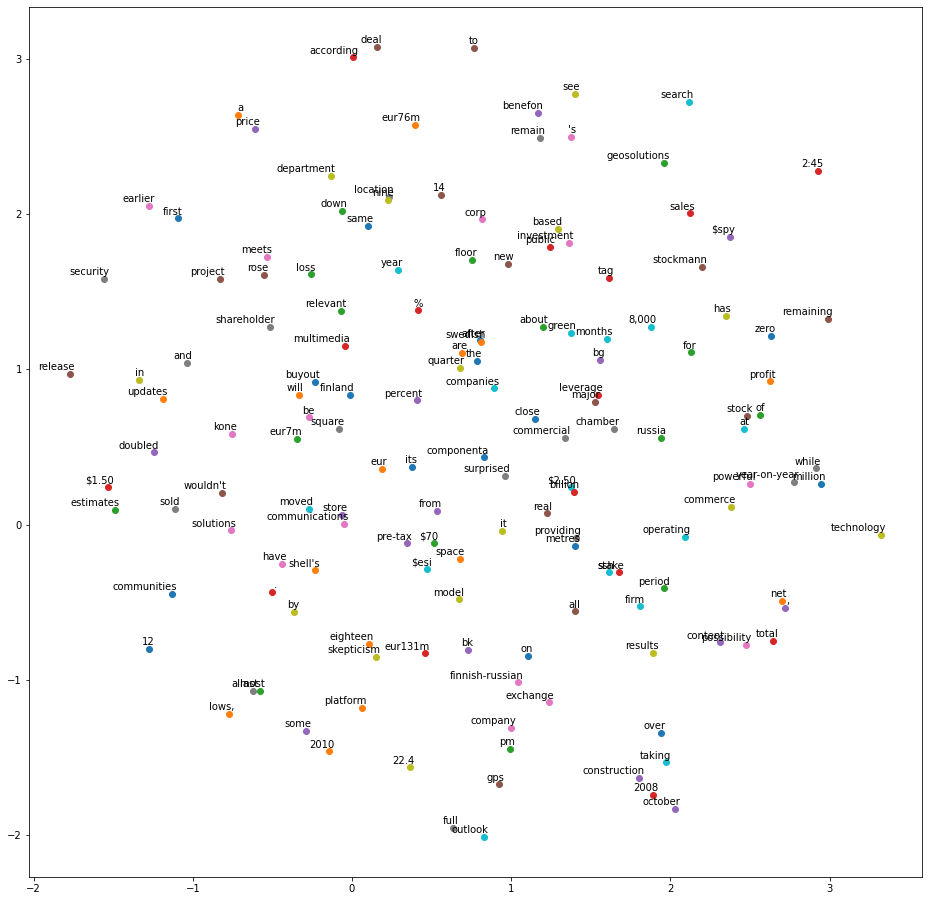

In [79]:
# from https://medium.com/swlh/word-embedding-word2vec-with-genism-nltk-and-t-sne-visualization-43eae8ab3e2e

def tsne_plot(model):
    labels, tokens = [], []
    vocab = model.wv.key_to_index.keys()
    for word in vocab:
        tokens.append(model.wv[word])
        labels.append(word)
    
    # vectorize tokens
    tsne = TSNE(perplexity=40, n_components = 2, init='pca', n_iter = 2500)
    tokens_vectorized = tsne.fit_transform(tokens)
    x, y = [], []
    
    # get tokens coordinates
    for vec in tokens_vectorized:
        x.append(vec[0])
        y.append(vec[1])
    
    # plot tsne
    plt.figure(figsize = (16,16))
    for index, (x_coord, y_coord) in enumerate(zip(x, y)):
        plt.scatter(x_coord, y_coord)
        plt.annotate(labels[index], xy=(x_coord, y_coord), xytext = (5,2), 
                     textcoords='offset points', ha='right', va='bottom')
    plt.show()
    
    
        

tsne_plot(model)